
## **저주파 통과 필터(Low\-Pass Filter, LPF)**

**저주파 통과 필터(Low\-Pass Filter, LPF)**, 특히 \*\*지수 가중 이동평균 필터(Exponentially Weighted Moving Average, EWMA)\*\*는 **저주파 성분만 통과**시키고 **고주파 잡음**을 제거하는 신호 처리 기법입니다. 이 필터는 특히 최근의 데이터를 더 강조하면서 과거의 데이터를 점진적으로 덜 반영하는 방식으로 동작하여 신호에서 잡음을 줄이고 부드러운 출력을 제공합니다.


 **1.** **이론적 배경**


저주파 통과 필터는 **주파수 영역**에서 **고주파** 성분을 차단하고 **저주파** 성분만 통과시키는 필터입니다. 고주파 성분은 일반적으로 신호에서 **잡음**으로 작용하며, 이를 제거하면 신호의 **핵심 패턴**을 더 잘 파악할 수 있습니다.


**지수 가중 이동평균 필터**는 **이전 값**과 **현재 값**을 결합하여 신호를 필터링합니다. 특히 **최근 데이터**에 더 많은 가중치를 부여하는 특징이 있어, 신호의 급격한 변화를 더 잘 반영하면서도 잡음을 제거하는 역할을 합니다.


 **2.** **수식 및 재귀적 관계**


지수 가중 이동평균 필터는 재귀적 방식으로 계산됩니다. 기본적인 필터링 방정식은 다음과 같습니다:


 ${\bar{x} }_k =\alpha x_k +(1-\alpha ){\bar{x} }_{k-1}$ ​


여기서:

-  ${\bar{x} }_k$ 는 **현재 필터링된 값**입니다.
-  $x_k$ ​는 **현재 입력 값**(측정된 값)입니다.
-  ${\bar{x} }_{k-1}$ ​은 **이전 필터링된 값**입니다.
-  $\alpha$ 는 **가중치 계수**로, $0<\alpha <1$ 범위의 값을 가지며 최근 데이터와 과거 데이터의 비율을 결정합니다.

 **3.** $\alpha$ **의 역할과 트레이드오프**

-  $\alpha$ 값이 **작을수록**: 현재 데이터 $x_k$ 에 더 큰 가중치가 부여됩니다. 즉, 필터는 **현재 데이터에 민감**하게 반응하지만, **잡음**이 더 많이 포함될 수 있습니다.
-  $\alpha$ 값이 **클수록**: 과거 데이터 ${\bar{x} }_{k-1}$ 에 더 많은 가중치가 부여됩니다. 이 경우 필터는 **부드럽고 잡음 제거 성능**이 뛰어나지만, **신호 변화에 대한 반응 속도**가 느려질 수 있습니다.

 $\alpha$ 의 적절한 선택은 **신호 특성**과 **응용 상황**에 따라 달라집니다. 예를 들어, 급격한 변화가 많은 신호에서는 작은 $\alpha$ 값이 유리할 수 있고, 상대적으로 부드러운 신호를 유지하려면 큰 $\alpha$ 값이 적합합니다.


 **4.** **수식 전개**


위의 재귀식을 계속 전개하면 과거 데이터가 지수적으로 감소하는 가중치를 가지는 것을 확인할 수 있습니다. 이를 여러 단계로 전개하면:


$${\bar{x} }_k =\alpha x_k +(1-\alpha )(\alpha x_{k-1} +(1-\alpha ){\bar{x} }_{k-2} )$$

이를 계속 확장하면 다음과 같은 결과를 얻습니다:


$${\bar{x} }_k =\alpha x_k +\alpha (1-\alpha )x_{k-1} +\alpha (1-\alpha )^2 x_{k-2} +\ldots$$

이 식은 과거의 데이터들이 **지수 함수적으로 감소하는 가중치**를 가지고 필터링된다는 사실을 보여줍니다. 이는 최근 데이터에 더 많은 비중을 두는 방식으로 신호를 처리하여, **급격한 변화**에도 민감하게 반응할 수 있게 만듭니다.


### **1. 초음파 거리 측정과 잡음**

초음파 센서를 사용하여 거리 측정 데이터를 수집할 때, 환경적인 요인이나 센서 자체의 노이즈 때문에 **잡음**이 포함될 수 있습니다. 이때 측정된 거리 데이터는 매우 **불규칙**하고 **잡음**이 포함되어 있어 신호가 흔들리는 경우가 많습니다.


이를 해결하기 위해 **저주파 통과 필터**를 적용하면 고주파 잡음이 제거되고, 신호가 부드러워집니다. 지수 가중 이동평균 필터는 특히 최근 데이터에 더 많은 비중을 두기 때문에, **실시간으로 급격한 거리 변화**도 효과적으로 반영할 수 있습니다.



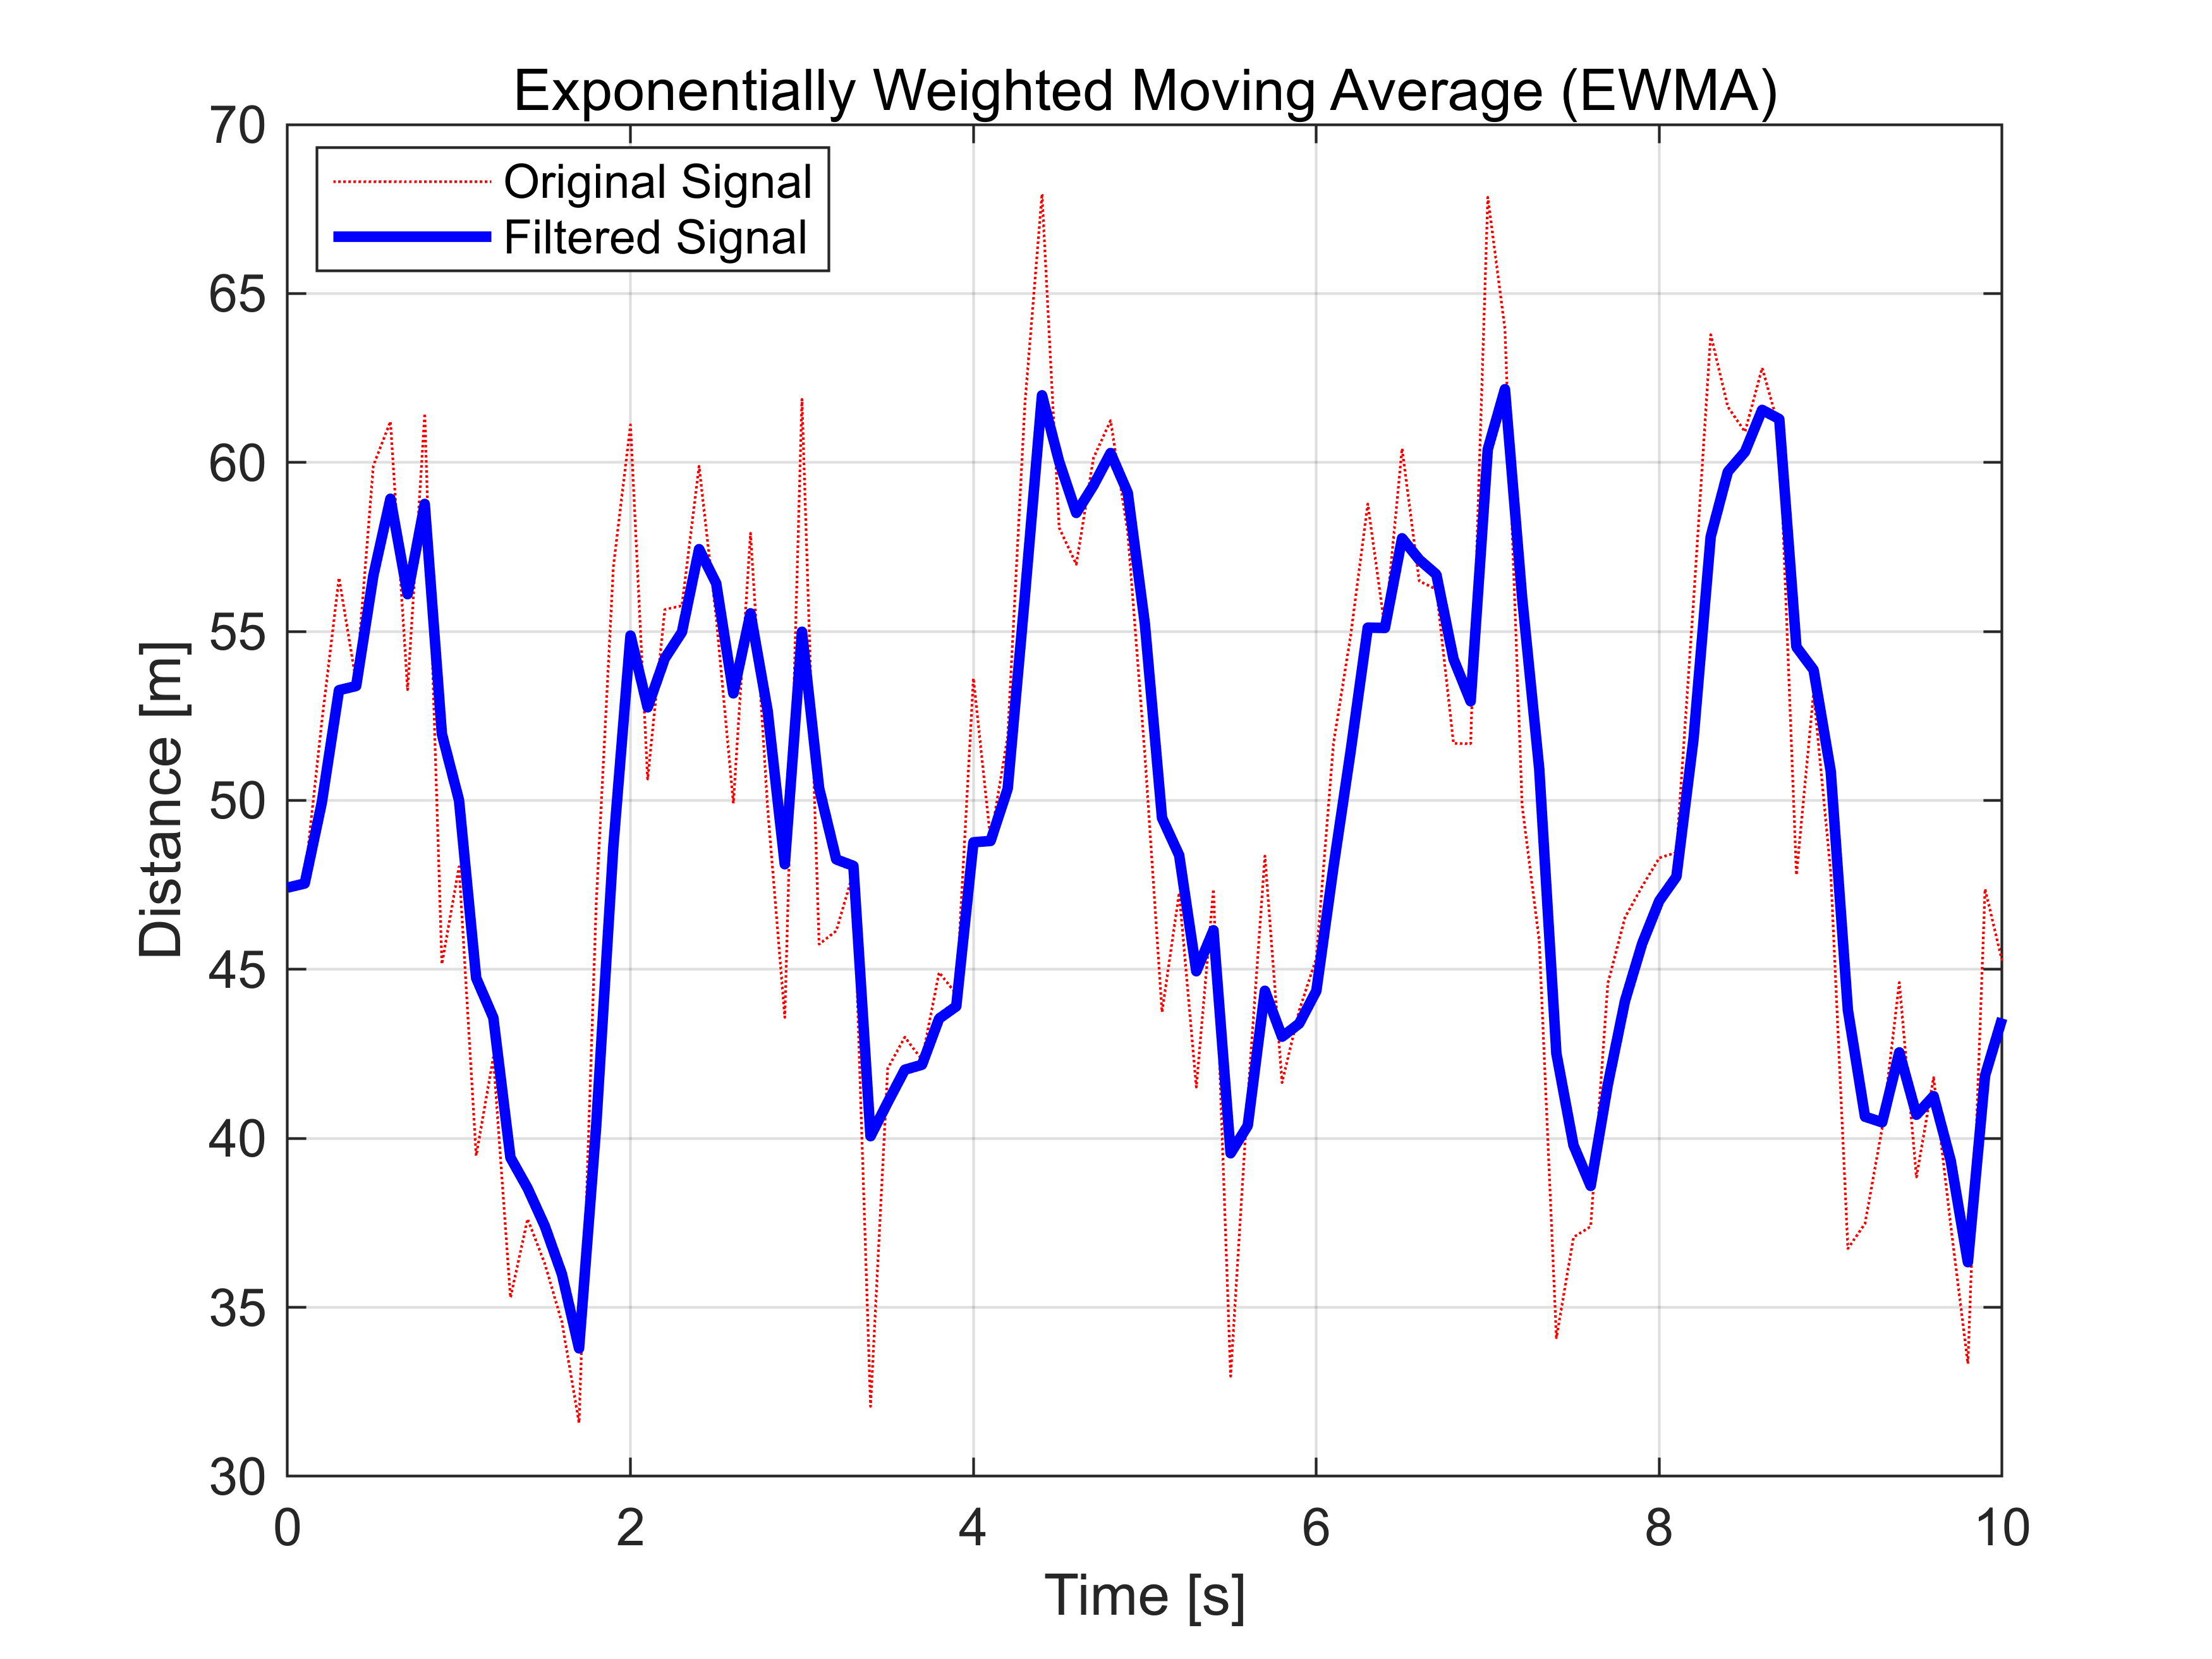

In [1]:
% 지수 가중 이동평균 필터 적용 예시 (초음파 거리 측정 데이터)

% 1. 가상의 초음파 거리 측정 데이터 생성
t = 0:0.1:10;  % 시간 데이터
signal = 50 + 10*sin(2 * pi * 0.5 * t) + 5 * randn(size(t));  % 신호 + 잡음

% 2. 지수 가중 이동평균 필터 함수 구현
function filtered_signal = EWMA(data, alpha)
    filtered_signal = zeros(size(data));  % 필터링된 데이터를 저장할 배열
    filtered_signal(1) = data(1);  % 첫 번째 데이터는 그대로 유지
    for i = 2:length(data)
        % 지수 가중 이동평균 필터 적용
        filtered_signal(i) = alpha * data(i) + (1 - alpha) * filtered_signal(i-1);
    end
end

% 3. 필터 적용
alpha = 0.5;  % 가중치 계수 설정
filtered_signal = EWMA(signal, alpha);

% 4. 결과 시각화
figure;
plot(t, signal, 'r:', 'DisplayName', 'Original Signal');
hold on;
plot(t, filtered_signal, 'b-', 'LineWidth', 2, 'DisplayName', 'Filtered Signal');
legend('Location', 'Best');
title('Exponentially Weighted Moving Average (EWMA)');
xlabel('Time [s]');
ylabel('Distance [m]');
grid on;

-  **원본 신호**: 신호에는 많은 잡음이 포함되어 있으며, 신호가 매우 불규칙하게 나타납니다.
-  **필터링된 신호**: 필터를 적용한 후, 신호는 잡음이 제거되고 부드럽게 변화합니다. 특히 **최근 데이터**를 더 많이 반영하므로, 급격한 변화에도 민감하게 반응할 수 있습니다.
### **2. 주식 시장 분석****에서의 저주파 통과 필터 (지수 가중 이동평균 필터)**

주식 시장에서 **지수 가중 이동평균 필터**는 **주가의 단기 변동성을 완화**하고 **장기 추세를 파악**하는 데 사용됩니다. 이를 통해 급격한 변동성이나 잡음을 제거하고, **매수 및 매도 신호**를 감지할 수 있습니다.



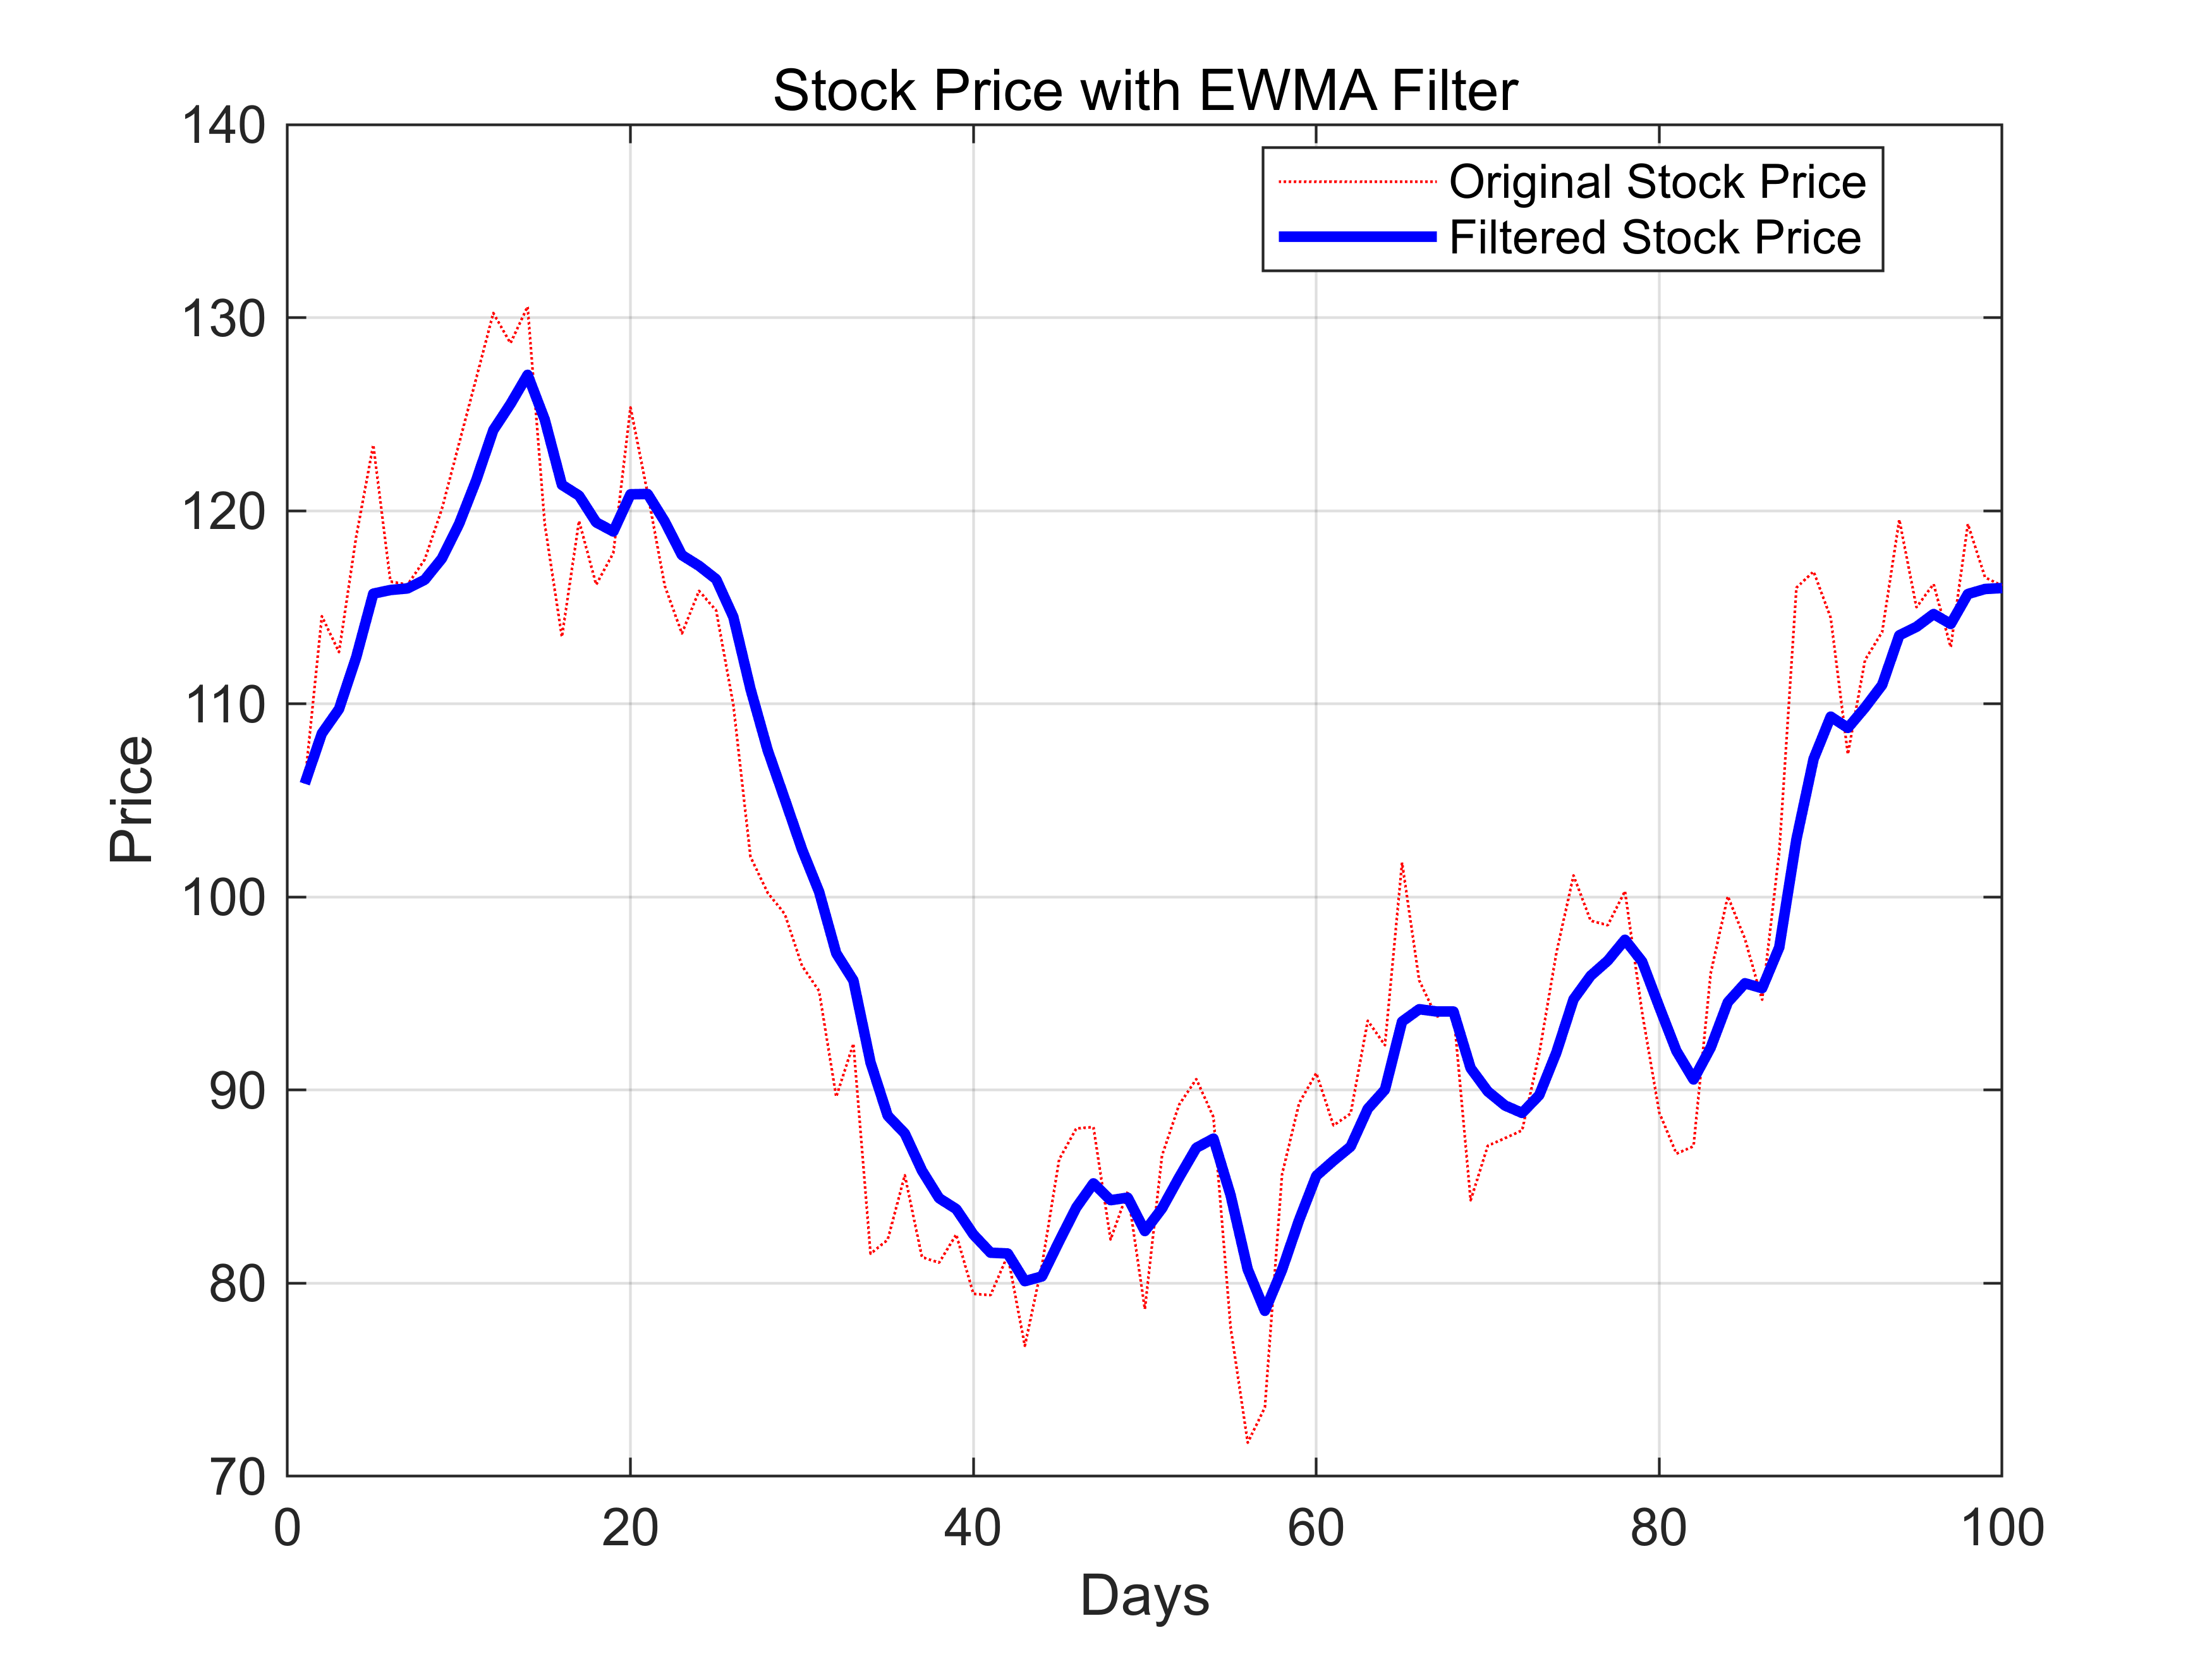

In [2]:
% 1. 가상의 주식 시장 데이터를 생성
days = 1:100;  % 100일간의 주식 데이터
stock_price = 100 + cumsum(5 * randn(1, length(days)));  % 무작위로 생성된 주가 데이터

% 2. 지수 가중 이동평균 필터 함수 구현
function filtered_price = EWMA_1(data, alpha)
    filtered_price = zeros(size(data));
    filtered_price(1) = data(1);
    for i = 2:length(data)
        filtered_price(i) = alpha * data(i) + (1 - alpha) * filtered_price(i-1);
    end
end

% 3. 필터 적용 (alpha = 0.3, 최근 데이터에 더 민감하게 반응)
alpha = 0.3;
filtered_stock_price = EWMA_1(stock_price, alpha);

% 4. 결과 시각화
figure;
plot(days, stock_price, 'r:', 'DisplayName', 'Original Stock Price');
hold on;
plot(days, filtered_stock_price, 'b-', 'LineWidth', 2, 'DisplayName', 'Filtered Stock Price');
legend('Location', 'Best');
title('Stock Price with EWMA Filter');
xlabel('Days');
ylabel('Price');
grid on;

-  주가의 변동성을 줄이고, 더 부드럽게 변화하는 **주가 추세**를 볼 수 있습니다.
-  **단기 변동성**을 완화하여 **장기적인 추세**를 파악할 수 있습니다.
###  **3.** **신호 처리****에서의 저주파 통과 필터 (지수 가중 이동평균 필터)**

전자기 신호나 센서 데이터를 처리할 때 저주파 통과 필터는 **잡음을 제거**하고 **신호의 실제 패턴**을 파악하는 데 유용합니다. 예를 들어, **온도 센서 데이터**나 **초음파 센서 데이터**에서 잡음을 줄여 부드러운 데이터를 얻을 수 있습니다.



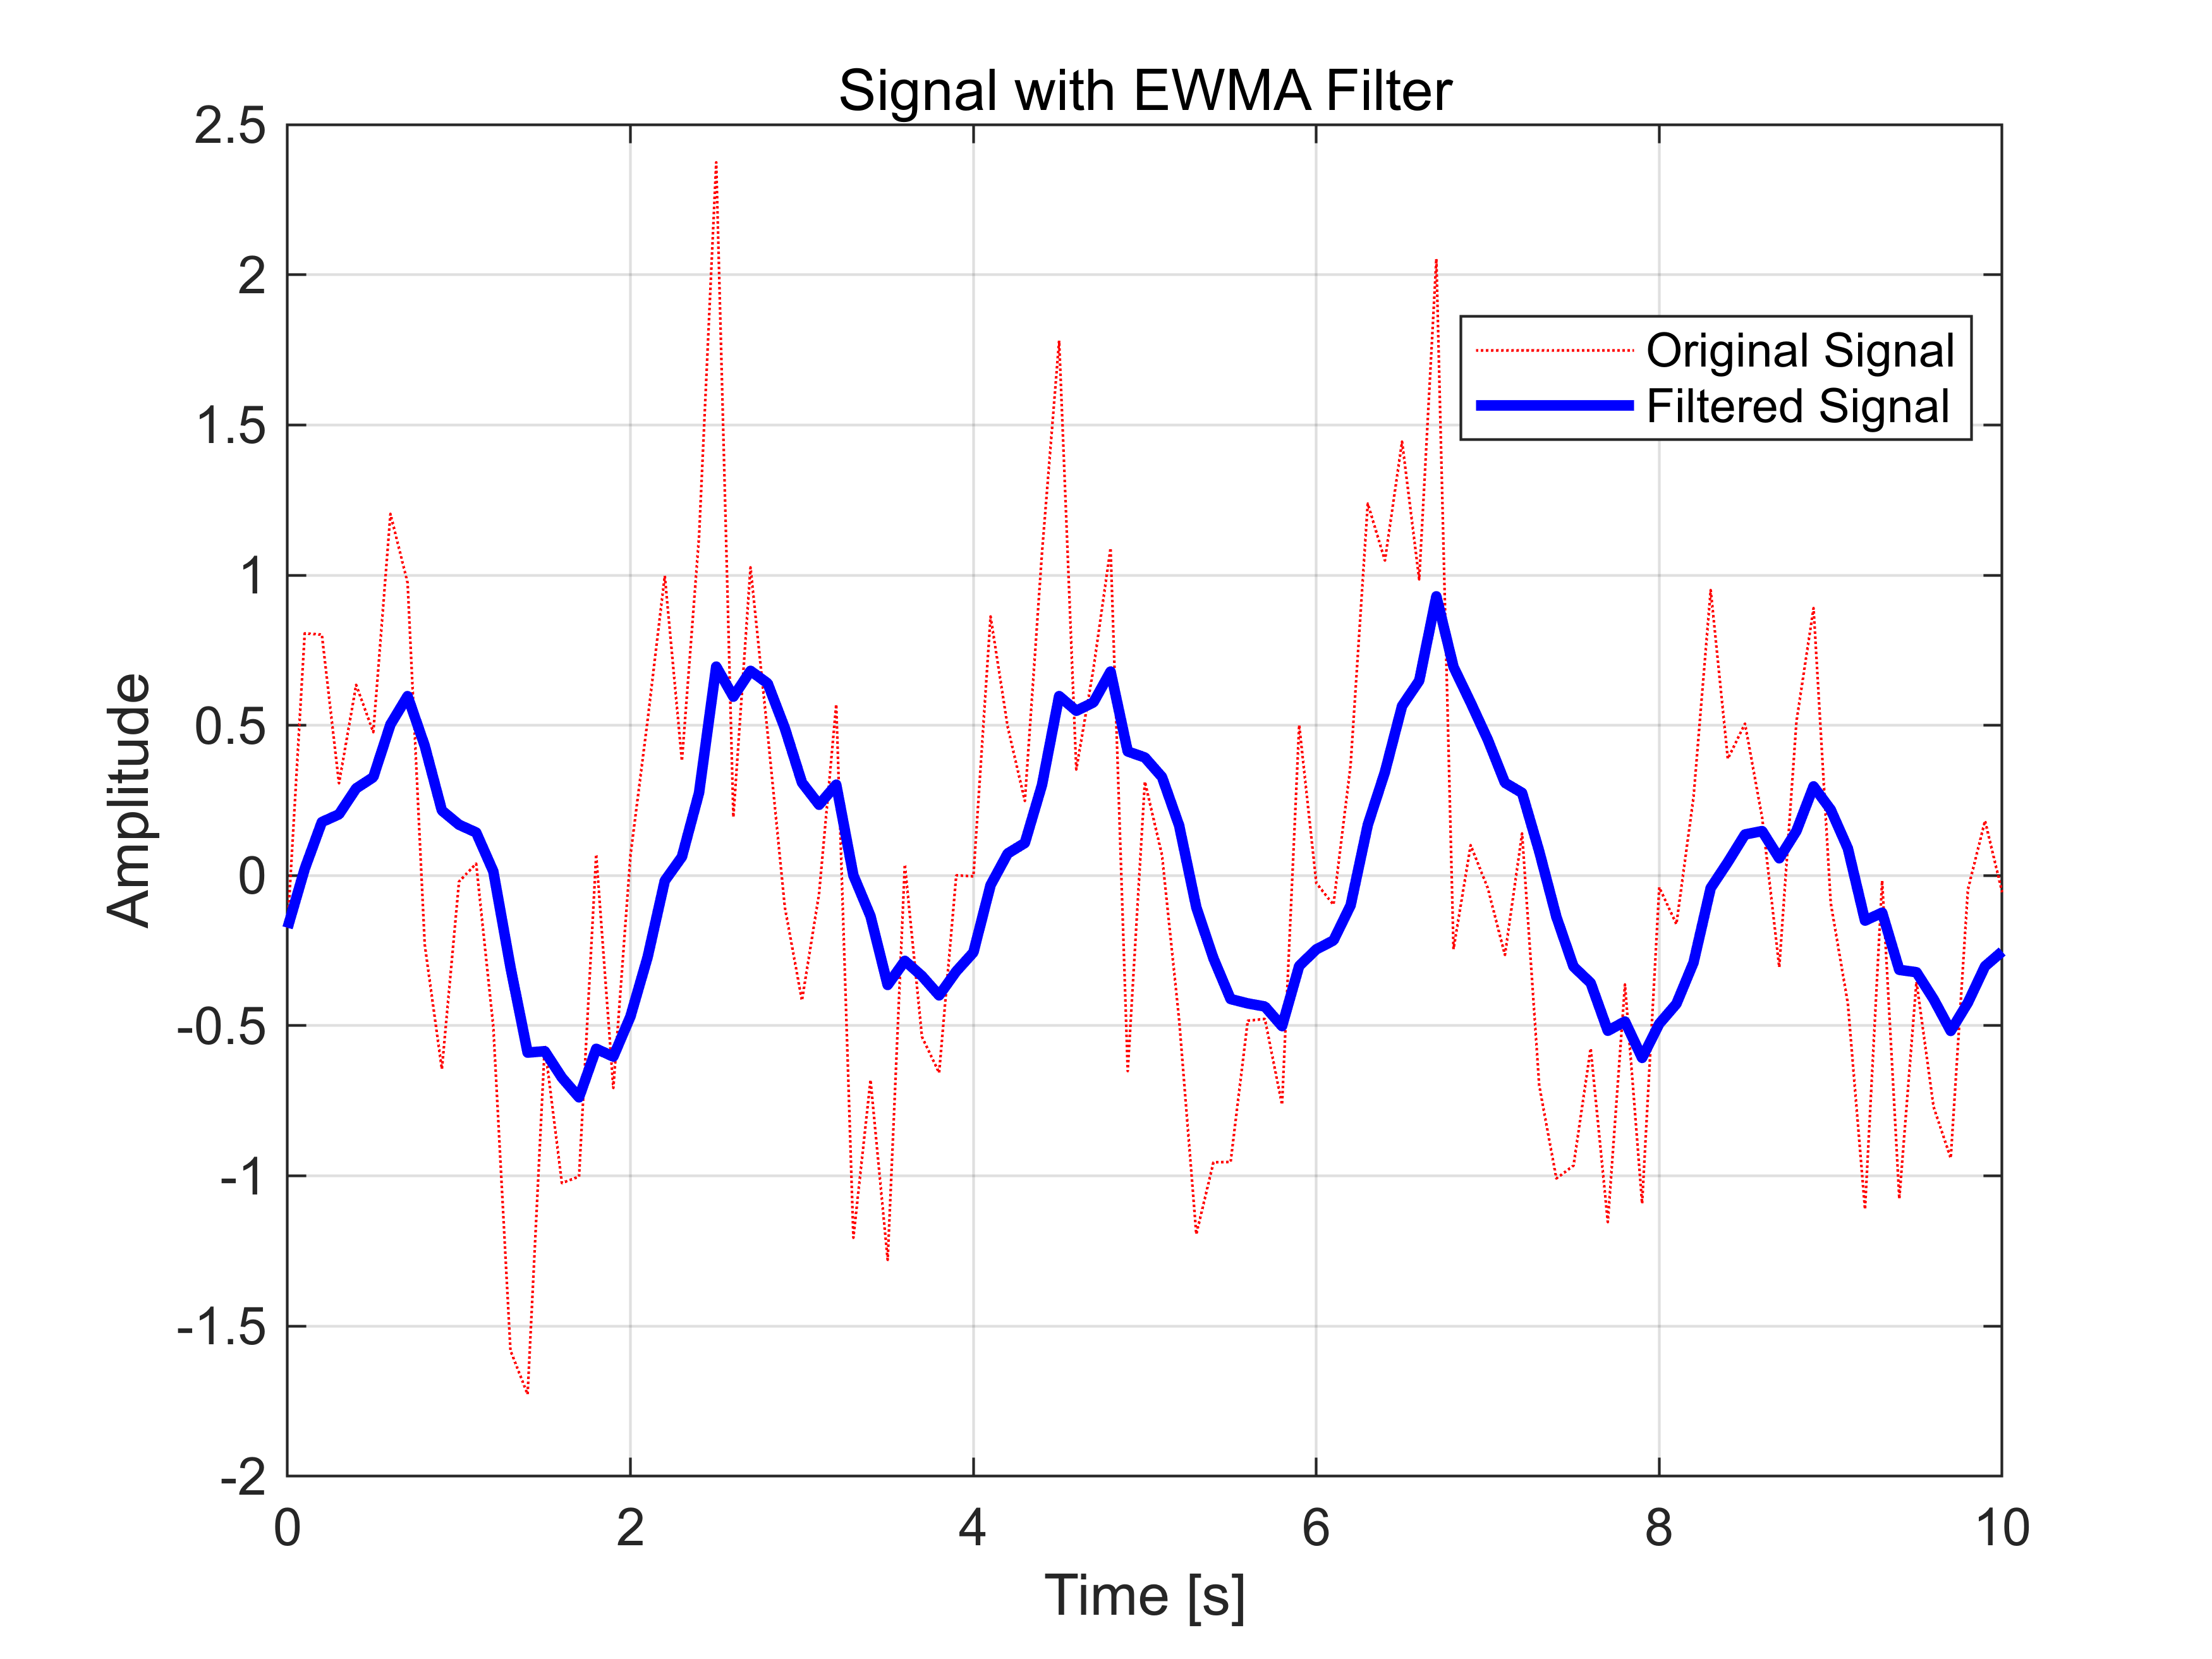

In [3]:
% 1. 가상의 신호 데이터를 생성 (잡음 포함)
t = 0:0.1:10;  % 시간 데이터
signal = sin(2 * pi * 0.5 * t) + 0.5 * randn(size(t));  % 저주파 신호 + 잡음

% 2. 지수 가중 이동평균 필터 함수 구현
function filtered_signal = EWMA_2(data, alpha)
    filtered_signal = zeros(size(data));
    filtered_signal(1) = data(1);
    for i = 2:length(data)
        filtered_signal(i) = alpha * data(i) + (1 - alpha) * filtered_signal(i-1);
    end
end

% 3. 필터 적용 (alpha = 0.2, 고주파 잡음을 제거)
alpha = 0.2;
filtered_signal = EWMA_2(signal, alpha);

% 4. 결과 시각화
figure;
plot(t, signal, 'r:', 'DisplayName', 'Original Signal');
hold on;
plot(t, filtered_signal, 'b-', 'LineWidth', 2, 'DisplayName', 'Filtered Signal');
legend('Location', 'Best');
title('Signal with EWMA Filter');
xlabel('Time [s]');
ylabel('Amplitude');
grid on;

-  원본 신호에 포함된 **잡음**을 제거하고, 부드러운 신호를 얻을 수 있습니다.
-  **저주파 통과 필터**를 통해 **고주파 잡음**이 제거된 신호를 확인할 수 있습니다.
###  **4.** **온도 변화 분석****에서의 저주파 통과 필터 (지수 가중 이동평균 필터)**

기후 데이터나 온도 데이터는 때때로 **단기적 변동성**이 클 수 있습니다. 지수 가중 이동평균 필터를 사용하여 **단기 변동성**을 완화하고 **장기적인 온도 추세**를 파악할 수 있습니다.



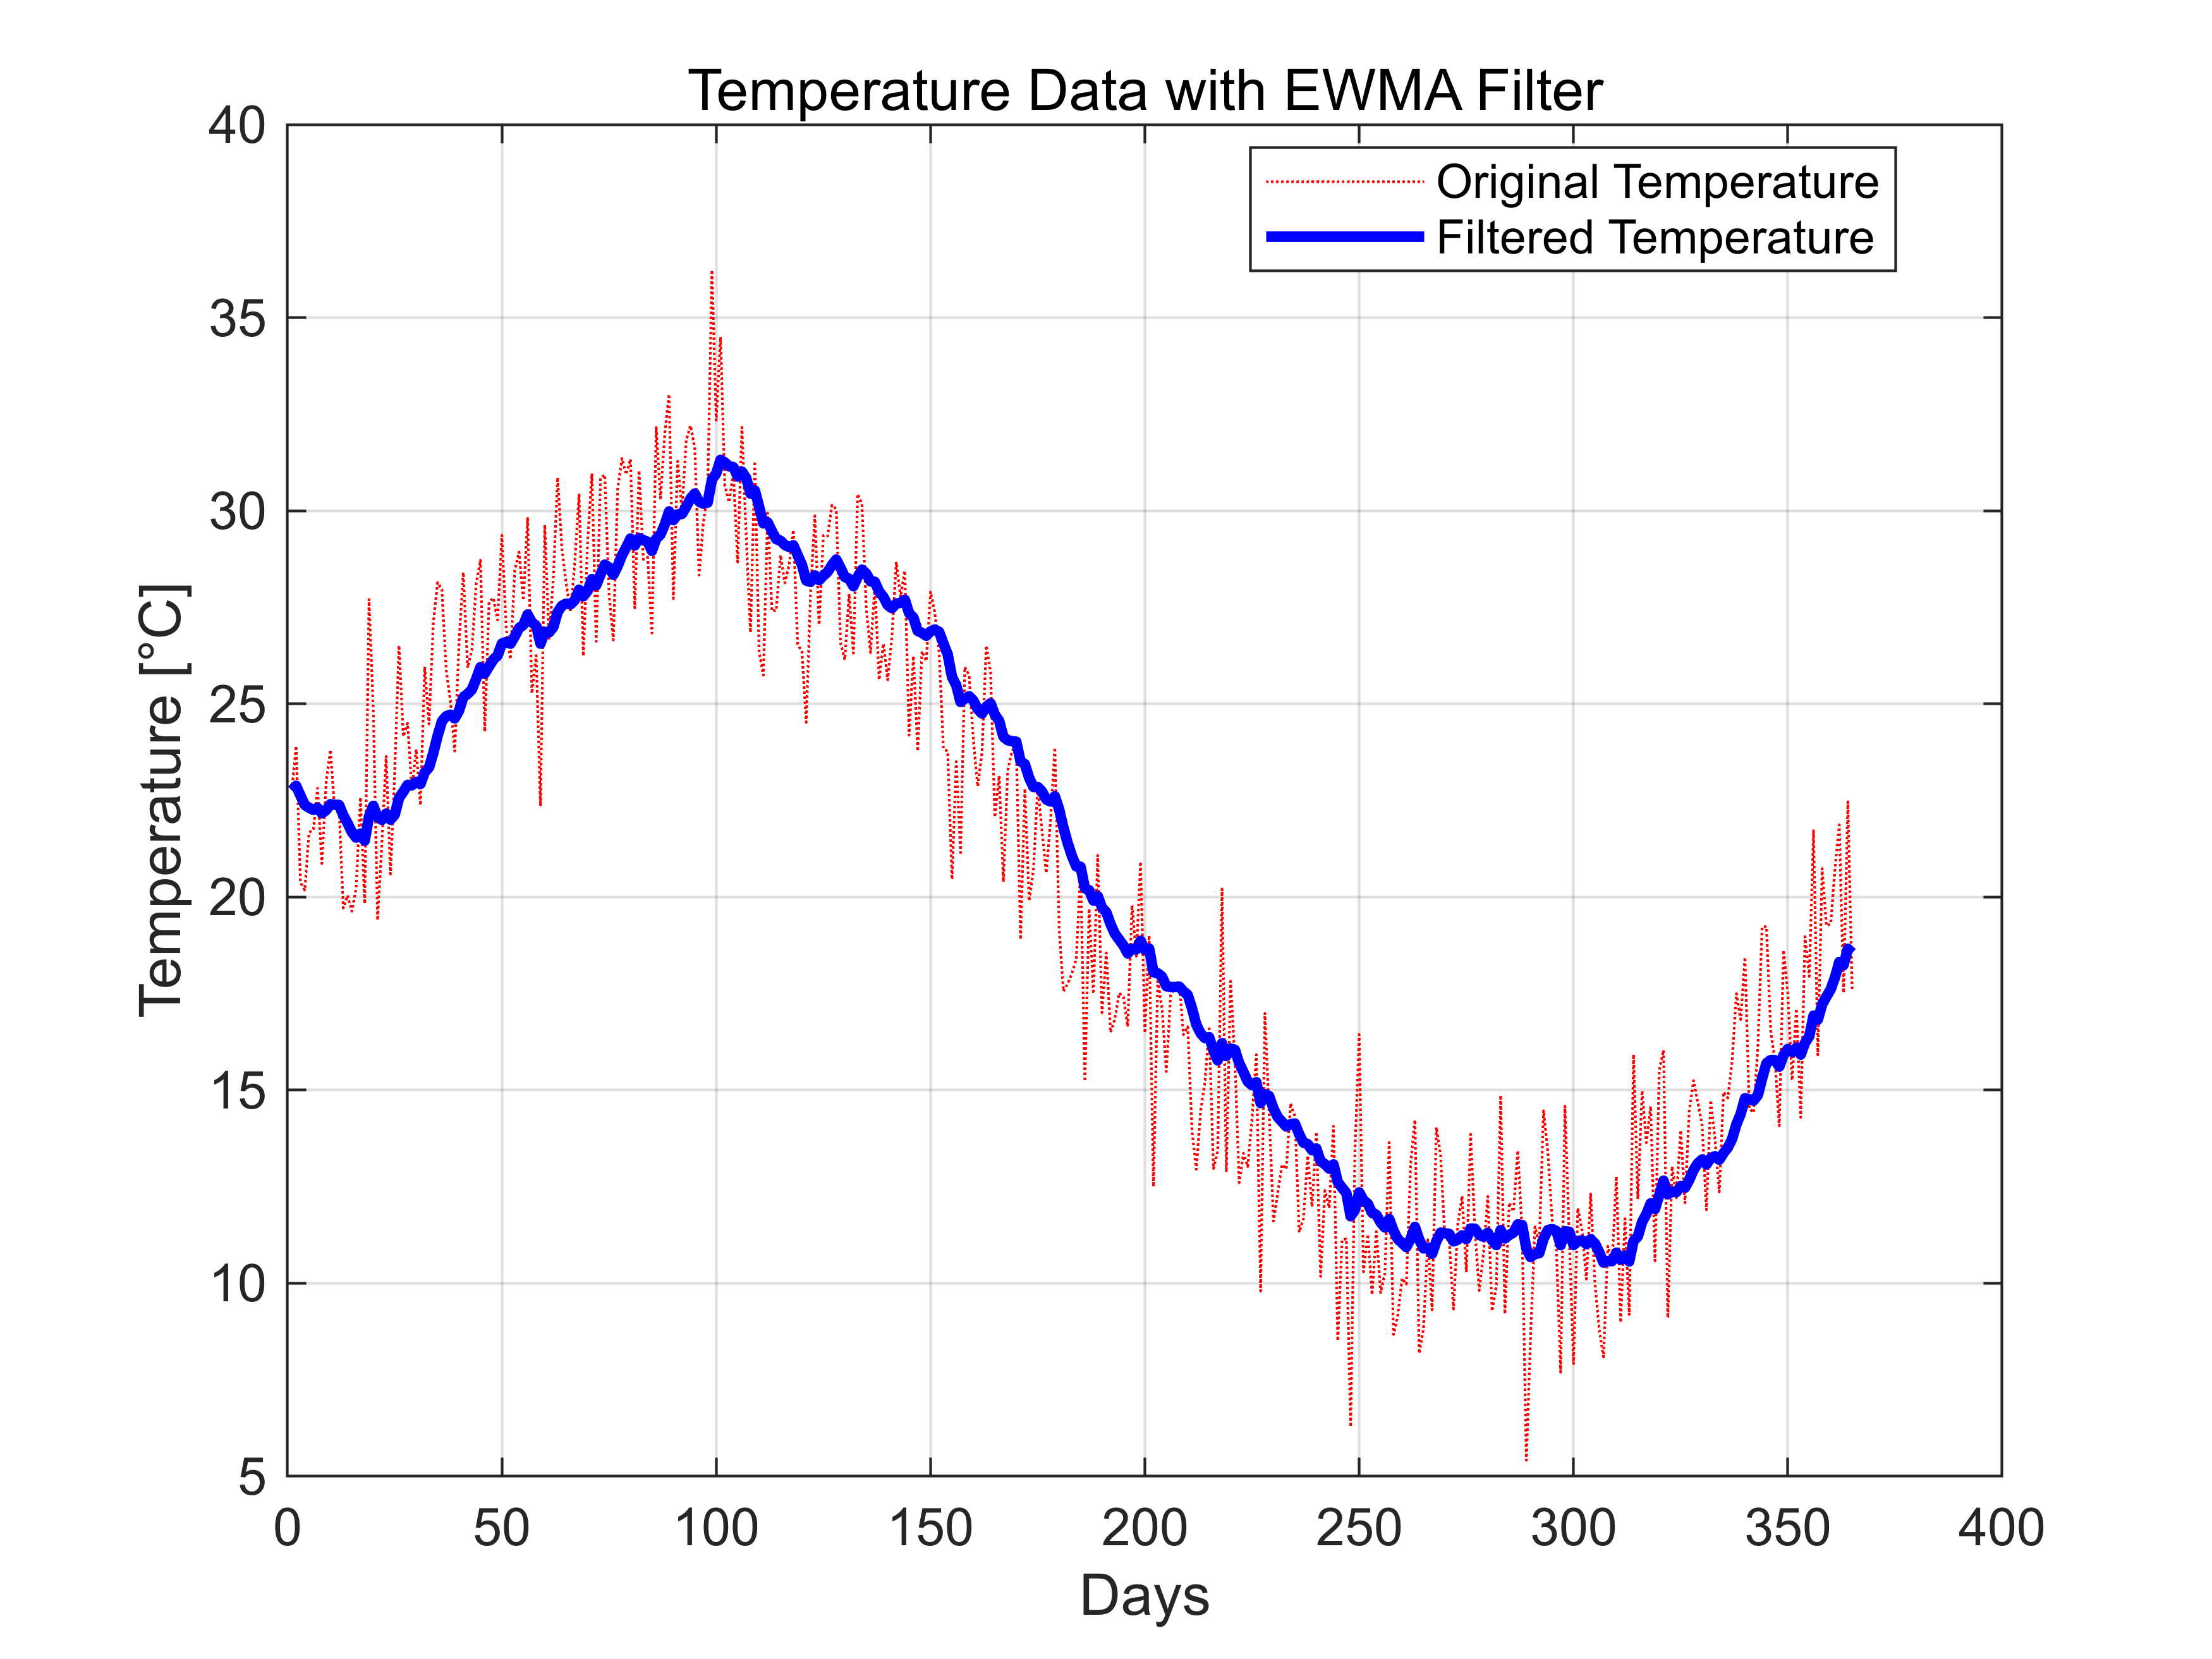

In [4]:
% 1. 가상의 온도 변동 데이터를 생성
days = 1:365;  % 1년간의 온도 데이터
temperature = 20 + 10*sin(2 * pi * days / 365) + 2 * randn(1, length(days));  % 계절적 변화 + 잡음

% 2. 지수 가중 이동평균 필터 함수 구현
function filtered_temp = EWMA_3(data, alpha)
    filtered_temp = zeros(size(data));
    filtered_temp(1) = data(1);
    for i = 2:length(data)
        filtered_temp(i) = alpha * data(i) + (1 - alpha) * filtered_temp(i-1);
    end
end

% 3. 필터 적용 (alpha = 0.1, 장기 추세 파악)
alpha = 0.1;
filtered_temperature = EWMA_3(temperature, alpha);

% 4. 결과 시각화
figure;
plot(days, temperature, 'r:', 'DisplayName', 'Original Temperature');
hold on;
plot(days, filtered_temperature, 'b-', 'LineWidth', 2, 'DisplayName', 'Filtered Temperature');
legend('Location', 'Best');
title('Temperature Data with EWMA Filter');
xlabel('Days');
ylabel('Temperature [°C]');
grid on;

-  계절적 변화에 따른 온도 변화에서 **단기적인 변동성**을 줄이고 **장기적인 추세**를 파악할 수 있습니다.
-  **온도 변화** 데이터에서 잡음을 제거하여 더 **안정적인 데이터**를 얻습니다.
